# GPU bench-marking with image classification

video num 17

video = "https://youtu.be/YmDaqXMIoeY?si=rzaURIjH6qKXYCRM"

We will be doing a GPU Performance test for our Deep Learning job today, we will take 60k small images and try to classifiy them using Artificial Neural Networks.

We are not using Convolution Neural Network because we havent covered it yet, so we will simply use Artificial Neural Networks (ANN)

So we will train it using CPU first then GPU then we will just benchmark the result

CPU are generally slower than GPU, whatever GPU u have in ur laptop u can use it and see the performance difference

For me, i dont have a NVIDIA GPU in this laptop so i will just test it on CPU then just take screenshots of the video and walk you through

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

We can list down the physical devices which are available to tensorflow for use, so for example, u can see the GPU here
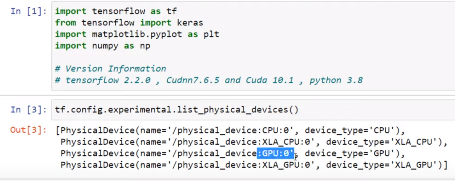
If ur computer has a GPU, u need to install certain libraries or softwares in orer to make use of that GPU in ur Deep Learning job

There is this nice article, this article describes what all u need to install, especially **CUDA** toolkit and **cuDNN** which is CUDA's Deep neural network library and ONLY after that you will see GPU listen below

Article link = "https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/"

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# What is CUDA and cuDNN?

CUDA and cuDNN are technologies developed by NVIDIA that are crucial for accelerating the training and inference of deep learning models by leveraging the parallel processing power of NVIDIA GPUs

### CUDA
1. CUDA is a parallel computing platform and an API model created by NVIDIA. It allows developers to use NVIDIA GPUs for general-purpose processing (an approach known as **GPGPU**, General-Purpose computing on Graphics Processing Units).
2. **What it is:** CUDA is a tool created by NVIDIA that allows you to use their graphics cards (GPUs) for doing complex calculations, not just for rendering graphics.
3. **Why it's important:** GPUs can do many calculations at once (in parallel), which makes them much faster than CPUs for certain tasks.
4. **Where we use it:** In deep learning, training models involves a lot of math (like multiplying big matrices). CUDA helps speed up this math by using the GPU, making the training process much faster.

### cuDNN
1. **What it is:** cuDNN is a special GPU-accelerated library built on top of CUDA that’s designed specifically for deep learning. It includes efficient implementations of the operations commonly used in neural networks.
2. **Why it's important:** These operations, like convolutions (used in Convolutional Neural Networks, or CNNs), are very complex and can be slow. cuDNN makes them much faster by optimizing them for NVIDIA GPUs.
3. **Where we use it:** When training or running deep learning models, frameworks like TensorFlow or PyTorch use cuDNN to perform the heavy lifting. This means your models train and run much faster than if they were using the CPU or non-optimized code.

### Summary
1. CUDA lets you use NVIDIA GPUs to do many calculations quickly.
2. cuDNN makes the specific calculations needed for deep learning even faster.

### In deep learning, you use these technologies to:

1. **Train models quickly:** By speeding up the mathematical computations required for learning.
2. **Run models efficiently:** By making predictions faster, which is important for applications like real-time image or speech recognition.
So, whenever you’re working with deep learning on NVIDIA GPUs, CUDA and cuDNN are working behind the scenes to make everything run smoothly and quickly.

# What if i dont have NVIDIA GPU?

In this laptop i have **Intel(R) HD Graphics 520** which wont work with CUDA.

CUDA and cuDNN are specifically designed to work with NVIDIA GPUs. They take advantage of the architecture and capabilities of NVIDIA graphics cards to provide significant performance improvements for parallel computations and deep learning tasks. Therefore, they do not work with non-NVIDIA GPUs, such as Intel HD Graphics or AMD GPUs.

The Intel HD Graphics 520 is an integrated graphics processor (IGP) found in some Intel CPUs. It is not designed for heavy parallel computation like NVIDIA GPUs, and it does not support CUDA or cuDNN. This means you cannot use cuDNN to accelerate neural network training or inference on an Intel HD Graphics 520.

## What You Can Do

If you have an Intel HD Graphics 520, you still have a few options for working with neural networks:
1. **Use CPU:** You can train and run neural networks on your CPU. Most deep learning frameworks like TensorFlow and PyTorch support CPU execution. However, this will be much slower compared to using a dedicated GPU.

2. **Optimize CPU Usage:** Ensure that you are using all available CPU cores and making use of optimized libraries that can speed up CPU computations. For example, TensorFlow has optimizations for Intel CPUs (using Intel Math Kernel Library, MKL).

3. **Cloud Services:** You can use cloud-based services that provide access to powerful GPUs. Platforms like Google Colab, Amazon Web Services (AWS), Microsoft Azure, and Google Cloud Platform offer GPU instances where you can run your deep learning tasks. Google Colab even offers free access to some GPU resources, although with usage limits.

You can verify using below code if the Tensorflow is build with CUDA

In [3]:
tf.test.is_built_with_cuda()

False

Well we will just continue and follow the tutorial using the CPU

# Load Dataset (CIFAR-10)
First we need to load the **CIFAR-10** keras dataset which is a dataset for small images for bird, cat, deer, airoplane, horse, etc and we will do a Clasification.
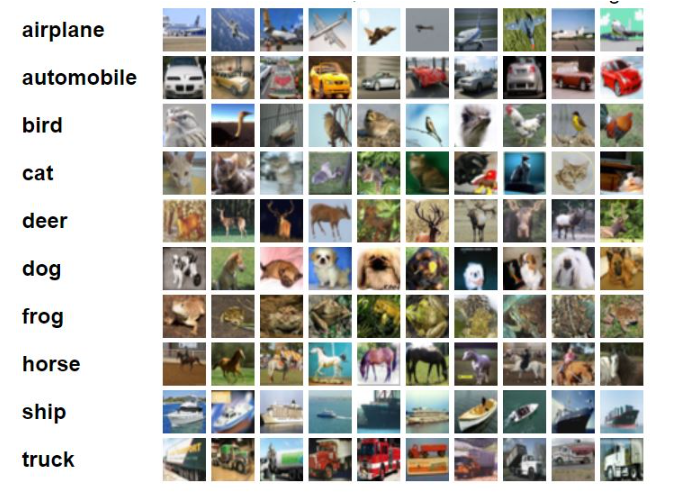
u can google keras dataset and see what different datasets thet have, anyways we wil load it

We will be using **ANN** here not **CNN** which is typically used for image classifications

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

We can see that we have 50k samples and the X and y dimension is 32 by 32 and 3 is the 3rd dimension which is the rbg (red green blue)

Lets check an example

So X_train[0] shows the first sample and the first sample itself is 32 by 32 by 3

In [6]:
X_train[0].shape

(32, 32, 3)

and y_train is simply the classes

In [7]:
y_train.shape

(50000, 1)

Lets check whats the first 5 samples are

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

So the first 5 images/samples shows 6,9,9,4,1 and 6 means frog image because if u count from 1 to 6 its frog
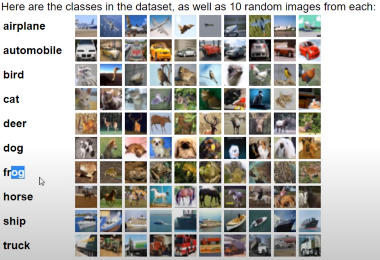

Similarly 9 means truck image

# Show images using imshow()
So lets verify if it is what it is, we will write a simple function using matplotlib to display the images using imshow()

In [9]:
def plot_samples(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_train[index])

So now lets plot the first sample, which we saw was 6 meaning frog

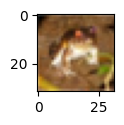

In [10]:
plot_samples(0)

We can see, it is a frog, now lets check the second sample

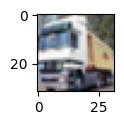

In [11]:
plot_samples(1)

So just to make it more simpler will make a list of all the classes in correct order

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

now if u check y_train at index 0 its 6 and it return an array, we dont want array just the value so we will do y_train[0][0]

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
y_train[0][0]

6

Now lets show it using the classes list above

In [15]:
classes[y_train[0][0]]

'frog'

So we can confirm that the first image is of a frog

## Scaling

We need to do scaling because when u scale the images ur model tends to perform better and in numpy array u can divide ur Training sample values with 255 because the rbg values range is 0 to 255.

So when we divide it by 255 what we are doing is normalizing it between 0 and 1

In [16]:
X_train / 255

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

So we will scale train and test

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

we dont need to scale y because its a class label, nothing to do with that!

## OneHotEncoding
if we look at our y_train it is a descerete value, we are doing Image classification of 0 to 9, so this time what we will do is divide this into Categorical value using OneHotEncoding



In [18]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

For example, first value is 6, if we wanna do Onehotencoding, we will create an array of size 10 where the 6th element will be 1 and remaining will be 0, and for doing this there is an API in Tensorflow as shown below using **to_categorical** which means it will convert them into categorical values (same as OneHotEncoding from SKLearn)

first parameter is the data itself, which is y_train, then num of classes are 10 because w have 10 classes in y_train from 0 to 9 and type simply is float

In [19]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")

In [20]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

So we can see it worked, so we will do the same thing with y_test as well

In [21]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

# Neural Network building
Now, lets build the NN

Will use keras sequential().

so in the sequential, we want to pass our NN layers.

1. First layer will be an input layer, so whats our input? our input is "X_train_scaled" and it has 50k images and each image is a 32 by 32 by 3 image and in NN we need to flatten that, so we will Flatten it using a Flatten layer in keras, its basically doing 32\*32\*3
2. Now we will need Hidden layer, so if you do 32\*32\*3 u get 3072, so we wanna create a hidden layer with neurons that are somewhat equal to the inputs so we will just give it a random of 3000 neurons, then we all know for hidden layer "relu" activation func is the best
3. Then will create one more hidden layer cuz its proven that if u have more hidden layers it tends to work better cuz in each layer it can extract the feature very well, so again we will give a random neurons, lets say 1000, its trial and error folks
2. Now we need to create Output layer, so output layer clearly has 10 neurons cuz we have 10 classes and will use Sigmoid activation func

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

# Compile and Train
Now we will compile the NN, here we will use SGD as optimizer because our dataset is alil bigger meaning it can take alot of computational if we use batch gradient descent, and for loss we will use "Categorical crossentropy" because we have categorical value, if we were using y_train which has discreate value then we would have used "parse Categorical crossentropy" but we are using y_train_categorical here which has categorical values as it is OneHotEncoded, so whenever u have OneHotEncoded parameters output values then use "Categorical crossentropy"

In [23]:
y_train[0:3] # this is discreate value so we use parse Categorical crossentropy

array([[6],
       [9],
       [9]], dtype=uint8)

In [24]:
y_train_categorical[0:3] # this is onehotencoded categorical value so we use Categorical crossentropy

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
model.compile(optimizer="SGD", 
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=5)


Epoch 1/5


1563/1563 [==============================] - 102s 64ms/step - loss: 1.8160 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6248 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.5424 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4817 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4309 - accuracy: 0.4936


# Prediction
So since we dont have NVIDIA GPU and CUDA, this is using our CPU by default hence it will be super slow

but once we are done with training, we can do prediction, before we do prediction, lets check whats the first sample is, we can see its cat, now when we run prediction, it will give us 10 outputs of probability so highest probability should be the cat, we will simply get the max probability using **np.argmax()** which will give the index of the max number and we would see that its 3, and if u look at the "classes" list we created above, class at index 3 is a cat!

In [26]:
classes[y_test[0][0]]

'cat'

In [33]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 4s 14ms/step


'cat'

# Evaluate
Now, lets chcek score using evaluate()

In [28]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 5s 15ms/step - loss: 1.5190 - accuracy: 0.4474


[1.51895272731781, 0.4474000036716461]

# CPU vs GPU Benchmark

Now, we are going to run the Performance test on both the models, for that we need to define a func called get_model(), its the same NN/model, but we just put it in a func, 

then we will now run this on a CPU first, so if u wanna run something on a CPU, the syntax is 
**with tf.device('/cpu:0'):**, why we are doing cpu:0? vecause if u look up on physical device list we can see the name is **cpu:0**, then will just call the get_model() func then will run the training for only 1 epoch cuz we dont wana wait too long

In [29]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Measure training time on a CPU
We also need to measure the time how long it took to train, so in Jupyter notebook there is this **%%timeit** magic, this will measure the time it took to execute one cell, this magic has some parameters so we will pass **%%timeit -n1 -r1** These arguments basically mean execute only once, if u dont provide these arguments what it will do is, it will execute the cell multiply times then take average time of all the executions, but will do it only once and will see how much time does it take

In [30]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 104s 66ms/step - loss: 1.8155 - accuracy: 0.3523
1min 52s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Measure training time on a GPU

I DONT HAVE A GPU SO THIS WONT RUN, ITS JUST EXAMPLE TO SHOW HOW WE MIGHT DO IT FOR GPU IF WE HAD IT

In [32]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

You can create below table for example

| Epoch | CPU | GPU  |
|:------|:------|:------|
| 1 | 43 sec | 3 sec |
| 10 | 7 min 26 sec | 30 sec |

You can see that GPU is almost 15 times faster. We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning